## Jeffrey Gordon, jtg2595

**This mini-project will be on Google colab. Make a copy for yourself and work on your own version. You do not need to download your code. Please do not submit your notebook, an HTML file, or anyother files. Click on Share bottom (on the top right), and change the permission to anyone with the link, give edit access, and then share the link on Canvas.**

*For all questions, include the Python commands/functions that you used to find your answer. Answers without supporting code will not receive credit.*

# Libraries 

Here I import some of the relevant libraries for your convinience, but feel free to make changes or import additional libraries, as needed. 

In [49]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

# Q1. Dependency of Resistance of Materials to Temperature (10 points)

Ohm's law states that the current through a conductor between two points is directly proportional to the voltage across the two points. Introducing a constant of proportionality, the resistance, one arrives at the usual mathematical expression that describes this relationship:

$$V = RI$$ 

where $I$ is the current through the conductor in units of amperes, $V$ is the voltage measured across the conductor in units of volts, and $R$ is the resistance of the conductor in units of ohms.

Resistance is an intrinsic property of any given material. There are many factors that can change the resistance of material including its "temperature." In an experiment, we want to study and model how the resistance changes with temperature at temperature close to zero Kelvin.

A scientist performs an experiment and measures the resistance of various materials at different temperatures. Now, the scientist asks you to use your expertise and fine a model that fits their data. The goal of this question is to practice regression modeling, understand the assumptions behind them, and evaluate the model using a set of visualizations.

First, load the dataset, `conductivity.csv`.

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/afarahi/Scientific-Machine-Learning/main/conductivity.csv') 
df.head()

,T,R1,R2,R3
0,1.089042,0.071018,3.108373,0.020145
1,2.436245,1.968973,3.819955,0.031398
2,3.491014,4.868741,21.414604,-0.017774
3,4.742245,6.592862,29.233224,0.006610
4,5.304033,5.851338,6.427411,-0.015857


In class we discussed `LinearRegression()`, use the `sklearn` documentation and describe the difference between `HuberRegressor()` and `LinearRegression()`. 

In [51]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import HuberRegressor 

### 1.1

Explain what is the difference between Huber Regressor and Linear Regression? and in which cases do we want to use the Huber model? **[2 points]**

Huber Regression is a regularized linear regression, in which outliers are given less importance/weight. So this regression algorithm is good for noisy data (data with likely bad data points in it).

### 1.2

Now, we use `LinearRegression()` and `HuberRegressor()` models from the `sklearn` library to fit a linear model to each material. Then visualize data and the best fit with `matplotlib` library. Note that for each  `[𝑇,𝑅]`  pair we need to have two plots one per model (total of six plots).**[2 points]**

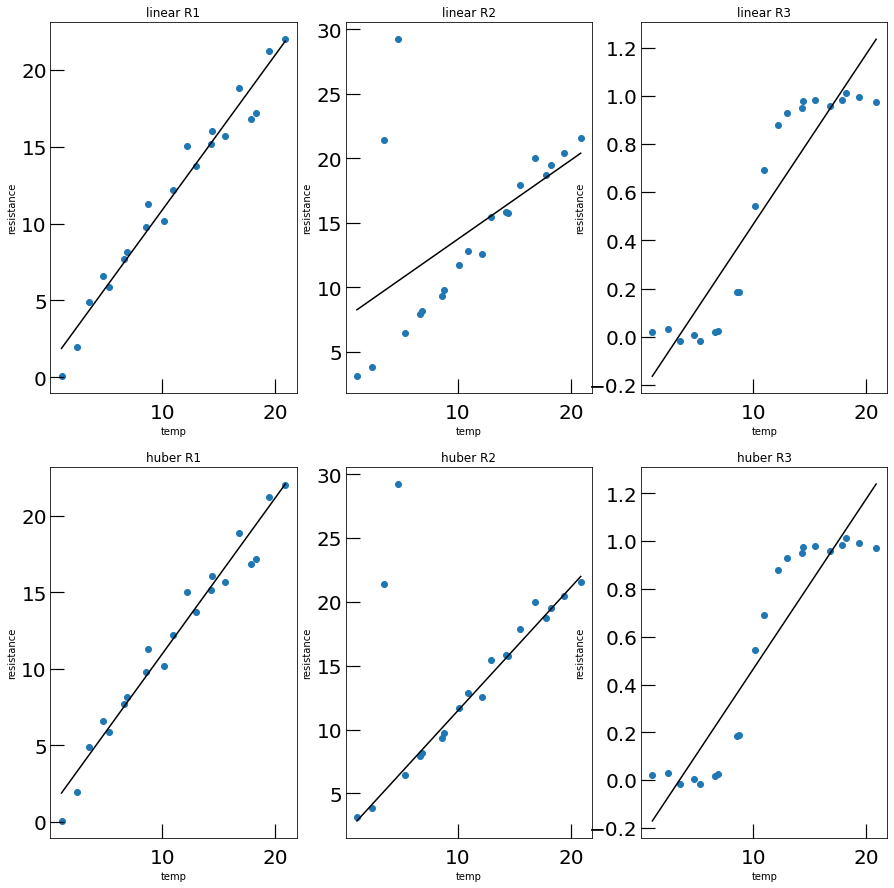

In [52]:
X = np.reshape(df['T'].values, (-1,1))

y_1 = df['R1'].values # y for R1
y_2 = df['R2'].values # y for R2
y_3 = df['R3'].values # y for R3

# make regression models for X -> y_1, X -> y_2, and X -> y_3 (predict materials resistance, given temperature)
linear_model_R1 = LinearRegression().fit(X, y_1)
huber_model_R1 = HuberRegressor().fit(X, y_1)

linear_model_R2 = LinearRegression().fit(X, y_2)
huber_model_R2 = HuberRegressor().fit(X, y_2)

linear_model_R3 = LinearRegression().fit(X, y_3)
huber_model_R3 = HuberRegressor().fit(X, y_3)

# now, plot the points + the regression line for each
figure, p = plt.subplots(2,3, figsize=(15, 15)) # make 2 rows, 3 columns of plots. 1 row per regression type, 1 column per R_i
for i in range(2):
  r = ''
  if i == 0:
    r = 'linear'
  else:
    r = 'huber'
  for j in range(3):
    y = 0
    if j == 0:
      y = y_1
      y_pred = linear_model_R1.predict(X)
      if r == 'huber':
        y_pred = huber_model_R1.predict(X)
    elif j == 1:
      y = y_2
      y_pred = linear_model_R2.predict(X)
      if r == 'huber':
        y_pred = huber_model_R2.predict(X)
    elif j == 2:
      y = y_3
      y_pred = linear_model_R3.predict(X)
      if r == 'huber':
        y_pred = huber_model_R3.predict(X)

    p[i,j].scatter(X,y)
    p[i,j].plot(X, y_pred, color = 'black')
    p[i,j].set_title(r + " R" + str(j + 1))
    p[i,j].set_xlabel("temp")
    p[i,j].set_ylabel("resistance")

### 1.4 

Now let’s visually, not statistically, evaluate our model and interpret the results, **per material**. Visually speaking which model fits the data better? **[3 points]**

For material R1, the models performed similarly. I would say that the huber model performed SLIGHTLY better, due to the very slight increase in slope. For R2, the huber model performed much better. The linear model performed terribly and was extremely inaccurate. This tells me that R2 had a lot of outliers. For R3, the performance was similar.

### 1.5 

Why do you think the `LinearRegression()` method failed for Material R2?
Why do you think the `HuberRegressor()` method did not fail for Material R2?
You may want to think about the key difference between the `LinearRegression()` and `HuberRegressor()` methods.
You can consult with scikit-learn documentation. **[2 points]**

As I mentioned above, the huber model likely performed better in R2, because R2 likely has a lot of outliers, which can easily skew a non regularized linear regression model.

### 1.6 

How do you justify the fact that `HuberRegressor()` could fit the data from materials R1 and R2 but not R3? Here, I want you to think about model misspecification and physics of this problem. BTW, congradulations, you re-discovered superconductivity.  **[1 points]**

The geometry of the data in R3 is an S shape (resistance flattened out as the temp rose, and it was flat in the beginning too), but our model is a linear function. So it cannot capture non linear data. We would need something like a logistic regression model to accurately model the data.

# Question 2: Separating stars and galaxies (15 points)

![](https://cdn.theatlantic.com/thumbor/6CLIOiY832IIWzvFRAGsbNRA2Ng=/0x173:1280x893/976x549/media/img/mt/2015/10/hubble_big_bang/original.jpg)

Modern astronomy and cosmology is concerned with the study and characterization of distant objects such as stars, galaxies, or quasars. Objects can often be very quickly characterized through detailed measurements of their optical spectrum. A spectrum is a measure of the photon flux (that is, the number of photons per second) as a function of photon frequency or wavelength.
 

The above spectrum is that of the star Vega, the brightest star in the northern constellation Lyra. Its surface temperature is about 9600 degrees Kelvin, and its spectrum is roughly that of a 9600K black-body, with absorption due to molecules in its atmosphere. Because of the quantum mechanical properties of atoms, different atoms can absorb light at only specific, discrete wavelengths. As such, characteristic patterns in the spectrum of a distant star can be used to infer its chemical composition!
In the spectrum above, the deepest of these absorption spikes are due to the energy levels of Hydrogen. From examination of high-resolution spectra like this one, one can learn a lot about the physical processes at work in a distant astronomical source. Unfortunately, spectra like these are very time-consuming and expensive to obtain, especially for very faint objects. For this reason, astronomers have long observed objects through broad-band filters. For the u-band filter shown above, the flux is given by

![](https://www.astroml.org/_images/plot_sdss_filters_1.png)

$$f  =\int f(\lambda) S(\lambda ) \frac{{\rm d}\lambda}{\lambda}$$

where $f(\lambda)$ is the filter transmission, and $S(\lambda)$ is the flux density of the spectrum at wavelength $\lambda$. For historical reasons, astronomers report the flux using the magnitude system, where the magnitude is defined by  u=−2.5log10[f / 3631 [Jy]], where the denominator is a normalization constant, measured in the unit of Janskys. To reduce the uncertainties associated with absolute calibration from telescope to telescope or from night to night, astronomers generally work in terms of the color, defined as the difference of magnitudes between two different filter bands. Subtracting two magnitudes reduces this uncertainty. For example, an observation of the star Vega above will consist of a vector four numbers: [u-g, g-r, r-i, i-z], where u=ultraviolet, and r=red, i/z=infrared.


As an example, the study of quasars, an amalgamation of the words “quasi-stellar radio source”, has led to many advances in our understanding of fundamental physics. Quasars, also commonly referred to as QSOs (Quasi-Stellar Objects) or AGNs (Active Galactic Nuclei) are galaxies which contain supermassive black holes at their core. These black holes can weigh-in at over 10 billion times the mass of our sun, and can be luminous enough to out-shine their entire galaxy. From the images alone, it would be impossible to distinguish between the star and the quasar: both are unresolved point-sources of similar apparent brightness. If a spectrum were available, distinguishing between them could be accomplished rather straightforwardly, but spectra are not always available. Using multi-color photometric information, rather than just a single image, however, this task becomes feasible. The goal here is to design a classification algorithm which can accurately distinguish between galaxies, stars, and quasars based on multi-color photometric measurements.

In [53]:
from sklearn import metrics
import sklearn

### 2.1

First read the data:

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/afarahi/Scientific-Machine-Learning/main/Skyserver_SQL.csv') 
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


You can only use the columns [‘u’, ‘g’, ‘r’, ‘i’, ‘z’] to perform the classification task and
the label column is `class`. We do not need the other columns. Thus the indepent variable should have 5 columns and the dependent variable should be the column `class`.

### 2.2

Construct the feature and dependent vectors. **[2 points]**

In [55]:
X = df[['u', 'g', 'r', 'i', 'z']].values
y = df['class'].values

### 2.3

Use `sklearn` library and train 2 different classifiers of your choice using the entire subset. **[4 points]**

In [56]:
# Gradient Boosting Classifier
# Gradient boosting works by using multiple weak classifiers to build a strong one
# First use a bad classifier, then build another using the observations it mis classified
# Repeat until convergence, and combine the properties of the classifiers
# We'll do this without a train/test set

from sklearn.ensemble import GradientBoostingClassifier
boost_model = GradientBoostingClassifier(learning_rate = .3).fit(X, y) # Gradient boost is prone to overfitting, so a small learning rate is best
boost_y_pred = boost_model.predict(X)

# Naive Bayes Classifier
# Bayes theorem gives probability of B, given A occured (conditional probability)
# A = class
# B = features
# Can calculate likelihood by creating frequency table and solving using Bayes theorem
# Then from this, you can get class probabilities

from sklearn.naive_bayes import CategoricalNB
bayes_model = CategoricalNB().fit(X,y)
bayes_y_pred = bayes_model.predict(X)

### 2.4

Evaluate the accuracy of your models. **[2 points]**

In [57]:
boost_acc = np.count_nonzero(boost_y_pred == y) / len(y)
print(f"Gradient boosting algorithm accuracy: {boost_acc}")

bayes_acc = np.count_nonzero(bayes_y_pred == y) / len(y)
print(f'Bayes algorithm accuracy: {bayes_acc}')

Gradient boosting algorithm accuracy: 0.9634
Bayes algorithm accuracy: 0.6441


### 2.5

Use scatter plot to visualize data in `x=g-z` and `y=g-r` space.
Use different color to distinguish between different classes.
Set `plt.ylim([-0.2, 1])` and `plt.xlim([-0.5, 2])`. 
What do you notice? Good visualization is important. Change your scatter plot until you can visually distinguish between clusters. **[4 points]**

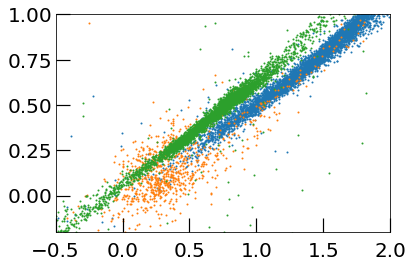

In [58]:
groups = df.groupby('class')

for name, group in groups:
  plt.scatter((group['g'] - group['z']), (group['g'] - group['r']), marker = "o", s = 1)

plt.xlim([-.5,2])
plt.ylim([-.2,1])
plt.show()

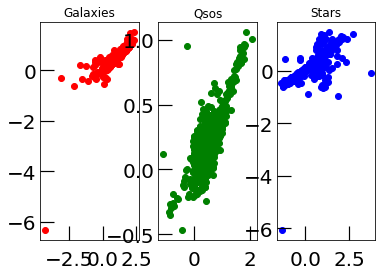

In [59]:
figure, p = plt.subplots(1,3)

groups = df.groupby('class')

for name, group in groups:
  if(name == "GALAXY"):
    p[0].scatter((group['g'] - group['z']), (group['g'] - group['r']), marker = "o", color = "red")
    p[0].set_title("Galaxies")
    #p[0].set_xlim([-.5,2])
    #p[0].set_ylim([-.2,1])
  elif(name == "QSO"):
    p[1].scatter((group['g'] - group['z']), (group['g'] - group['r']), marker = "o", color = "green")
    p[1].set_title("Qsos")
    #p[1].set_xlim([-.5,2])
    #p[1].set_ylim([-.2,1])
  else:
    p[2].scatter((group['g'] - group['z']), (group['g'] - group['r']), marker = "o", color = "blue")
    p[2].set_title("Stars")
    #p[2].set_xlim([-.5,2])
    #p[2].set_ylim([-.2,1]) 

# g is index 4
# z is index 7
# r is index 5

### 2.6 

Discuss some of your observations. It is an open question! Look at the figure above and performance of your model, and argue why you got such a high/low accuracy. Does the results make sense? **[3 points]** 

After separating each class into subplots and removing the limits, the clusters are easier to visualize. Looking at the graphs, it makes sense as to why Naive Bayes performed so poorly. The classes are very dense (close to each other), which makes it harder to classify. I would personally increase the dimensional space of the data to further separate the clusters and classify easier.

# Q3. Modeling The Housing Maket (20 points)

In this problem, we want to model the housing rental market in Austin from 2019 to 2021. While visualizing the raw data can be very informative (see Q2), but in many real-world cases, it is hard to visually find trends in raw data, hence, the need for modeling. In this question, our goal is to explore two non-parametric and fleaxible models we learned in class. Specifically, we will use Guassian processes and KLLR method to model price as a function of time. We want to study the impact of pandemic on different sectors of the housing market. 

In this question, we only look at `Single Family Residentials` and `Apartments`, so you can ignore the other property types. The data cleaning is already done for you; so you can simply dive into modeling. For data cleaning, we first convert `Close Date` column to a datetime data type. We then create a new column that computes the number of dates passed since January 1st, 2018. 


In [60]:
!pip install --upgrade git+https://github.com/afarahi/kllr.git
import kllr as kl
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/afarahi/kllr.git to /tmp/pip-req-build-pimhu_bs
  Running command git clone --filter=blob:none --quiet https://github.com/afarahi/kllr.git /tmp/pip-req-build-pimhu_bs
  Resolved https://github.com/afarahi/kllr.git to commit 871d2afca647a8291554803850959e6f03933f15
  Preparing metadata (setup.py) ... done


In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/afarahi/Scientific-Machine-Learning/main/Austin_rental_price.csv')[['Close$/SqFt', 'Close Date', 'Property Sub Type']]

# cleaning
# this is our independent variable
df['Close$/SqFt'] *= 1000.0 # change the unit to per 1000 sq ft

df['Close Date'] = pd.to_datetime(df['Close Date']) 

# this is our dependent variable
df['delta_time'] = (df['Close Date'] - datetime(2018, 1, 1)).dt.days 

# This coding is unnecessary but you might find it useful
df['Type'] = 9999
df['Type'][df['Property Sub Type'] == 'Single Family Resi'] = 1
df['Type'][df['Property Sub Type'] == 'Condominium'] = 2
df['Type'][df['Property Sub Type'] == 'Duplex'] = 3
df['Type'][df['Property Sub Type'] == 'Apartment'] = 4

# drop all rows with a missing value
df.dropna(inplace=True)

df

df_resi = df.loc[df['Type'] == 1]
df_apt = df.loc[df['Type'] == 4]

<ipython-input-61-074d0cf09277>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'][df['Property Sub Type'] == 'Single Family Resi'] = 1
<ipython-input-61-074d0cf09277>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'][df['Property Sub Type'] == 'Condominium'] = 2
<ipython-input-61-074d0cf09277>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'][df['Property Sub Type'] == 'Duplex'] = 3
<ipython-input-61-07

### 3.1 Visualizing the raw data

First, we visualize raw data. Make a scatter plot of price / 1000 sq ft as a function of `deta_time`. Then, make a vertical line that marks the begining of the COVID-19 pandemic (March, 1st. 2020). Can you visualy say how the price trends with time? **[2 points]**

Make two separate plots, one for `Single Family Resi` and one for `Apartment`. And then answer the above question for each type separaetly.

Text(0, 0.5, 'Price Per 1,000 SqFt')

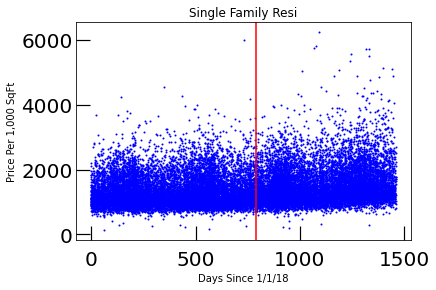

In [62]:
plt.scatter(df_resi['delta_time'], df_resi['Close$/SqFt'], color = "blue", s = 1)
plt.axvline(x = 790, color = 'red', label = 'axvline - full height')
plt.title("Single Family Resi")
plt.xlabel("Days Since 1/1/18")
plt.ylabel("Price Per 1,000 SqFt")

Text(0, 0.5, 'Price Per 1,000 SqFt')

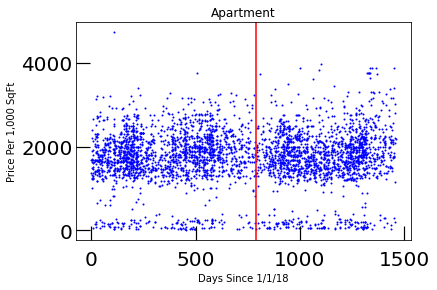

In [63]:
plt.scatter(df_apt['delta_time'], df_apt['Close$/SqFt'], color = "blue", s = 1)
plt.axvline(x = 790, color = 'red', label = 'axvline - full height')
plt.title("Apartment")
plt.xlabel("Days Since 1/1/18")
plt.ylabel("Price Per 1,000 SqFt")

For the single family residential, the price seems to have a general upward shift as times goes on. Not a huge one, though. The apartments seem to have a steady price. I dont see any correlation with the x axis.

**Now let's model these data with KLLR and Gaussian Processes.**

### 3.2 KLLR. 

Chose a gaussian kernel and fit a KLLR method. Describe the rational behind your choice of kernel width. **Do not** perform any cross-validation or pick a test statistic to justify your choice. Then visualize the fitted model for each property type (`Single Family Resi` and `Apartment`). Make a vertical line that marks the begining of the COVID-19 pandemic (March, 1st. 2020). **[6 points]**

/usr/local/lib/python3.8/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D


Text(0, 0.5, 'price')

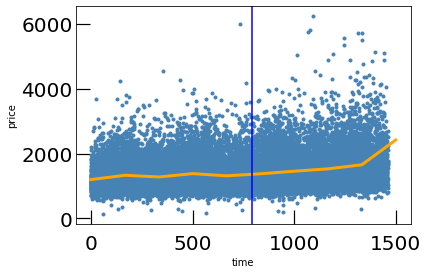

In [91]:
# KLLR is a type of linear regression that is localized. The kernel allows for points closer together to have more of an impact on each other. This allows for more non linearity within the model
# even though we are using linear regression. The kernel acts on the feature values, and its reflected in the predicted y value
# kernel with controls the size of the neighborhood of local data points

# Lets first do Resi
lm_resi = kl.kllr_model('gaussian', 10)

# Compute regression parameters
x_kllr_resi, y_exp_resi, intercept_exp_resi, slope_exp_resi, scatter_exp_resi, skew_resi, kurt_resi = lm_resi.fit(df_resi['delta_time'], df_resi['Close$/SqFt'], xrange=[0, 1500], bins=10, nBootstrap=1)

# plot resi
plt.plot(df_resi['delta_time'], df_resi['Close$/SqFt'], '.', color='steelblue')
plt.plot(x_kllr_resi, y_exp_resi, lw=3.0, color='orange')
plt.axvline(x = 790, color = 'blue', label = 'axvline - full height')
plt.xlabel('time')
plt.ylabel('price')

/usr/local/lib/python3.8/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D


Text(0, 0.5, 'price')

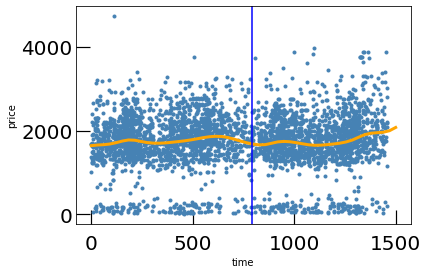

In [92]:
# Apartment
lm_apt = kl.kllr_model('gaussian', 50)

# Compute regression parameters
x_kllr_apt, y_exp_apt, intercept_exp_apt, slope_exp_apt, scatter_exp_apt, skew_apt, kurt_apt = lm_apt.fit(df_apt['delta_time'], df_apt['Close$/SqFt'], xrange=[0, 1500], bins=50, nBootstrap=1)

# plot resi
plt.plot(df_apt['delta_time'], df_apt['Close$/SqFt'], '.', color='steelblue')
plt.plot(x_kllr_apt, y_exp_apt, lw=3.0, color='orange')
plt.axvline(x = 790, color = 'blue', label = 'axvline - full height')
plt.xlabel('time')
plt.ylabel('price')

I chose kernel width based on how it made the model fit the data. If I put the width too high, the model would underfit the data, being too smooth. And if I put the width too low, the model would overfit. So I played around with kernel width and bin size in order to fit the data as best as possible.

### 3.3 Gaussian Processes

Now, construct a kernel and fit a Gaussian processes. Justify your choice of kernel function. Describe it in words how you chose it. Then visualize the fitted model for each property type (`Single Family Resi` and `Apartment`). Make a vertical line that marks the begining of the COVID-19 pandemic (March, 1st. 2020). **[6 points]**

Note that it would be difficult to run a GP on the entire data set. I suggest you randomly select a subset of this data set to fit a model. For instance you can select only one tenth of the original data set. 

/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


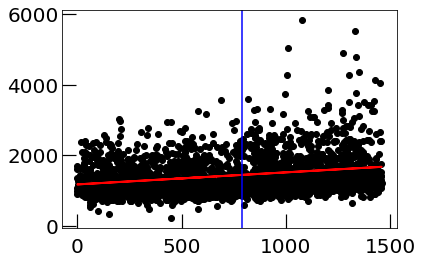

In [85]:
from math import floor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, DotProduct
import random

random.seed(10)

# Cut resi data to 10% of the original data
df_resi_ = df_resi.sample(floor(len(df_resi)/10))
x = np.reshape(df_resi_['delta_time'].values, (-1,1))
y = df_resi_['Close$/SqFt'].values

# length scale, kernel, gpr
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(x, y)

mean_predictions_gpr, std_predictions_gpr = gpr.predict(
    x,
    return_std=True,
)

# Plot the predictions of the gaussian process regressor
plt.scatter(
    x,
    y,
    color="black",
)

plt.plot(
    x,
    mean_predictions_gpr,
    label="Gaussian process regressor",
    linewidth=2,
    color = "red"
)
plt.axvline(x = 790, color = 'blue', label = 'axvline - full height')

/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


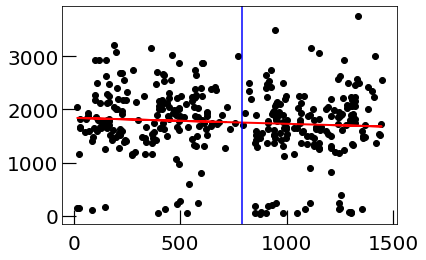

In [87]:
from math import floor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, DotProduct
import random

random.seed(11)
# Cut resi data to 10% of the original data
df_apt_ = df_apt.sample(floor(len(df_apt)/10))
x_apt = np.reshape(df_apt_['delta_time'].values, (-1,1))
y_apt = df_apt_['Close$/SqFt'].values

# length scale, kernel, gpr
kernel = DotProduct() + WhiteKernel()
gpr_apt = GaussianProcessRegressor(kernel=kernel)
gpr_apt.fit(x_apt, y_apt)

mean_predictions_gpr_apt, std_predictions_gpr_apt = gpr_apt.predict(
    x_apt,
    return_std=True,
)

# Plot the predictions of the gaussian process regressor
plt.scatter(
    x_apt,
    y_apt,
    color="black",
)

plt.plot(
    x_apt,
    mean_predictions_gpr_apt,
    label="Gaussian process regressor",
    linewidth=2,
    color = "red"
)
plt.axvline(x = 790, color = 'blue', label = 'axvline - full height')

As you can see, The line is slightly increasing in Resi, but very slightly decreasing with Apartment. I chose the kernel due to the fact that there is a good amount of outliers in the data, as well as the linear, "chunky" aspect of the data. So WhiteKernel + DotProduct seemed best fit for this problem. All in all, I would say that the GPR shows that there isnt a big correlation with time and price.

### 3.4 Solution comparison

Over plot GP and KLLR solutions on the same plot. Good visualization matters, label everything so I do not have to look at your code! The plot should be self-explanatory. Are the results consistent? **[2 points]**

Text(0.5, 1.0, 'Residential Models')

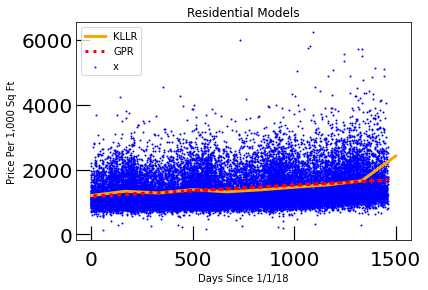

In [108]:
# Resi

# Data Points
plt.scatter(df_resi['delta_time'], df_resi['Close$/SqFt'], color='blue', label = 'x', s = 1)
# KLLR
plt.plot(x_kllr_resi, y_exp_resi, lw=3.0, color='orange', label = 'KLLR')
# GPR
plt.plot(x, mean_predictions_gpr, linewidth=3, color = "red", label = 'GPR', linestyle = 'dotted')
plt.legend(loc="upper left")
plt.xlabel('Days Since 1/1/18')
plt.ylabel('Price Per 1,000 Sq Ft')
plt.title('Residential Models')

Text(0.5, 1.0, 'Apartment Models')

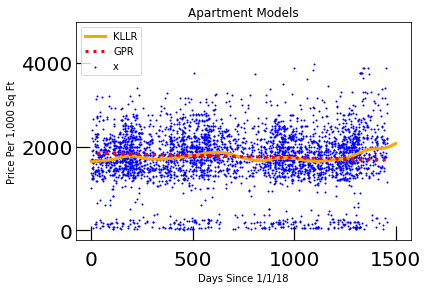

In [109]:
# Apt

# Data Points
plt.scatter(df_apt['delta_time'], df_apt['Close$/SqFt'], color='blue', label = 'x', s = 1)
# KLLR
plt.plot(x_kllr_apt, y_exp_apt, lw=3.0, color='orange', label = 'KLLR')
# GPR
plt.plot(x_apt, mean_predictions_gpr_apt, linewidth=3, color = "red", label = 'GPR', linestyle = 'dotted')
plt.legend(loc="upper left")
plt.xlabel('Days Since 1/1/18')
plt.ylabel('Price Per 1,000 Sq Ft')
plt.title('Apartment Models')

The results are consistent for the most part. The KLLR seemed to have fit a bit tighter compared to the GPR, however. 

### 3.5 Interpretation

Now, let's go back an interpret the results. Does the result of GP and KLLR fit differs? Can you identify any interesting trends in data? Visually speaking, do you think COVID-19 pandemic induced any shock in Austin's rental market? Justify your answers. Like many other real-world settings, there is no correct or wrong answer, here. However, your arguments should be supported by the above results. **[4 points]**

Visually, I do not see any evidence that COVID induced shock in the Austin rental market. On the date that COVID hit, the regression line did not do anything drastic. For Residential, the line steadily increased throughout, and for Apartments, the line stayed pretty consistent. This goes to show that there isnt any evidence that COVID impacted Austins rental market in any statistically significant manner, given the features and dependent variables we used.

# THE END